In [1]:
from IPython.core.display import HTML
with open('../style.css') as f:
    css = f.read()
HTML(css)

# Breadth First Search

The function `search` takes three arguments to solve a *search problem*:
- `start` is the *start state* of the search problem,
- `goal` is the *goal state*, and
- `next_states` is a function with signature $\texttt{next_states}:Q \rightarrow 2^Q$, where $Q$ is the set of states.
   For every state $s \in Q$, $\texttt{next_states}(s)$ is the set of states that can be reached from $s$ in one step.

If successful, `search` returns a path from `start` to `goal` that is a solution of the search problem
$$ \langle Q, \texttt{next_states}, \texttt{start}, \texttt{goal} \rangle. $$
The implementation of `search` uses the algorithm *breadth first search* to find a path from `start` to `goal`.

At the start of the $n^\textrm{th}$ iteration of the `while` loop, the following invariants are satisfied:
* `Frontier` contains exactly those states that have distance of $n-1$ from `start`.
* `Visited`  contains those states that have distance from start that is less than `n-1`.
* `Parent` is a dictionary. The keys of this dictionaries are all states from the sets `Visited`, `Frontier`, and `NewFrontier`.    Furthermore, the following invariant holds for all states $x \not= \texttt{start}$:
  - If $x = \texttt{Parent}[y]$, then $y \in \texttt{next_states}(x)$.  

In [2]:
def search(start, goal, next_states):
    Frontier = { start }
    Visited  = set()
    Parent   = { start: start }
    while Frontier:
        NewFrontier = set()
        for s in Frontier:
            for ns in next_states(s):
                if ns not in Visited and ns not in Frontier:
                    NewFrontier.add(ns)
                    Parent[ns] = s
                    if ns == goal:
                        print("number of states: ", len(Visited) + len(Frontier) + len(NewFrontier))
                        return path_to(goal, Parent)
        Visited |= Frontier
        Frontier = NewFrontier

Given a `state` and a parent dictionary `Parent`, the function `path_to` returns a path leading from `start` to the given `state`.

In [3]:
def path_to(state, Parent):
    p = Parent[state]
    if p == state:
        return [state]
    return path_to(p, Parent) + [state]

# Display Code

In [4]:
import graphviz as gv

The function $\texttt{toDot}(\texttt{source}, \texttt{Edges}, \texttt{Fringe}, \texttt{Visited})$ takes a graph that is represented by 
its `Edges`, a set of nodes `Fringe`, and set `Visited` of nodes that have already been visited.

In [5]:
def toDot(source, goal, Edges, Frontier, Visited, Parent=None):
    V = set()
    for x, L in Edges.items():
        V.add(x)
        for y in L:
            V.add(y)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR')
    for x in V:
        if x == source:
            dot.node(str(x), color='blue', shape='doublecircle')
        elif x in Frontier and x == goal:
            dot.node(str(x), label=str(x), color='magenta')
        elif x in Frontier:
            dot.node(str(x), label=str(x), color='red')
        elif x in Visited:
            dot.node(str(x), label=str(x), color='blue')
        else:
            dot.node(str(x), label=str(x))
    if Parent:        
        Path = path_to(goal, Parent)
    for u in V:
        if Edges.get(u):
            for v in Edges[u]:
                if Parent and v in Path and Parent[v] == u:
                    dot.edge(str(u), str(v), color='brown', style='bold')                    
                else:
                    dot.edge(str(u), str(v))
    return dot

# Testing

In [6]:
def next_states_test(node):
    x, y = node
    return { (x+1, y), (x, y+1) }

In [7]:
def create_edges(n):
    Edges = {}
    for row in range(n):
        for col in range(n):
            if (row, col) != (n-1, n-1):
                Edges[(row, col)] = list(next_states_test((row, col)))
    for k in range(n-1):
        Edges[(k, n-1)] = [(k+1, n-1)]
        Edges[(n-1, k)] = [(n-1, k+1)]
    return Edges

In [8]:
def search_show(start, goal, next_states, Edges):
    Visited  = set()
    Frontier = { start }
    Parent   = { start: start }
    while len(Frontier) > 0:
        display(toDot(start, goal, Edges, Frontier, Visited))
        NewFrontier = set()
        Visited    |= Frontier
        for s in Frontier:
            for ns in next_states(s):
                if not (ns in Visited):
                    NewFrontier.add(ns)
                    Parent[ns] = s
                    if ns == goal:
                        display(toDot(start, goal, Edges, NewFrontier, Visited, Parent))
                        return 
        Frontier = NewFrontier

In [9]:
def main(n):
    Edges = create_edges(n)
    search_show((0,0), (n-1, n -1), next_states_test, Edges)

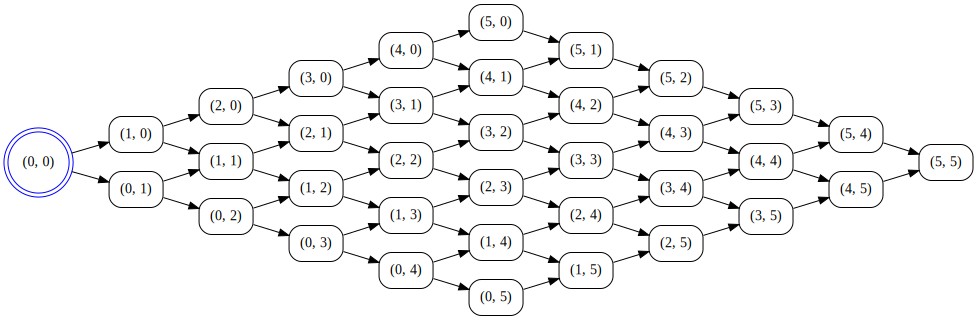

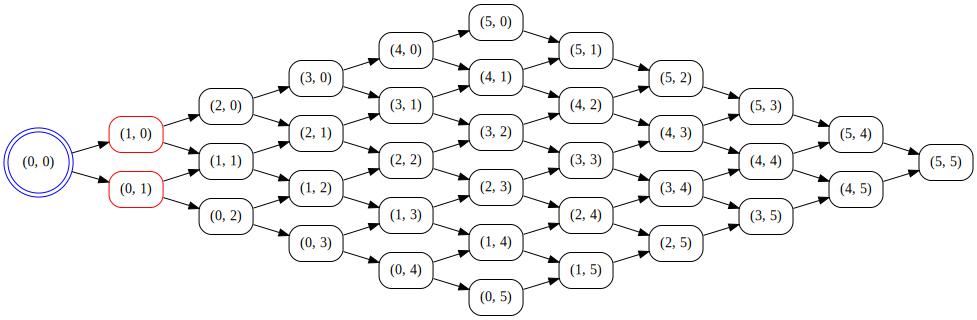

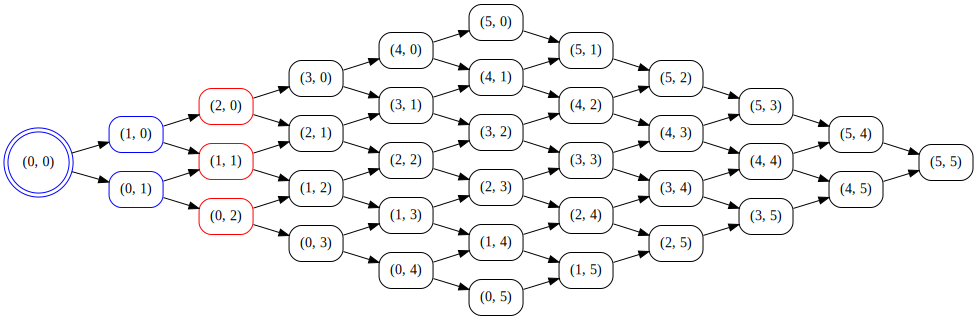

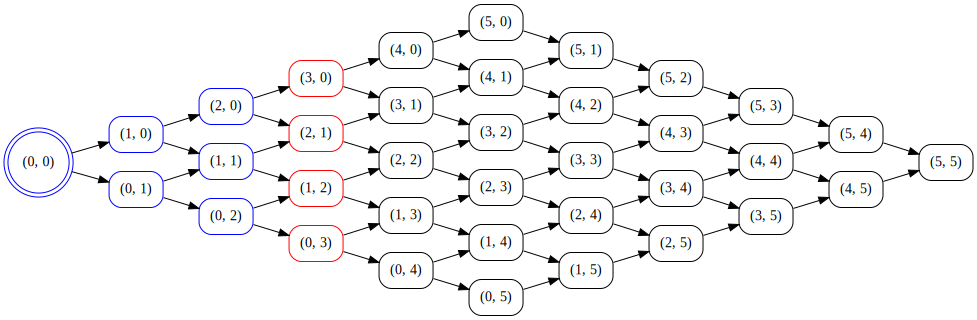

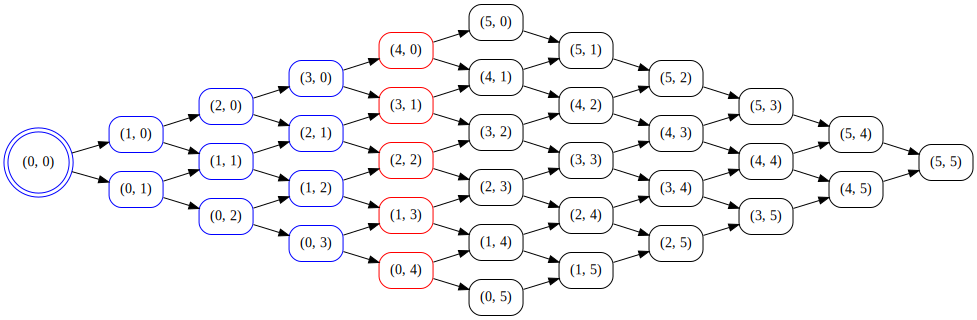

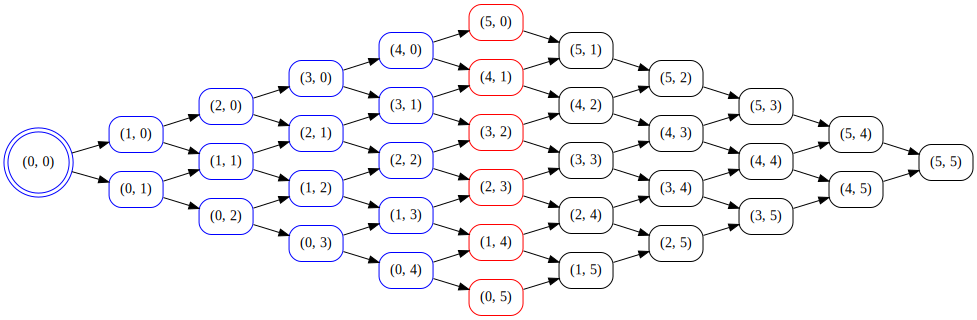

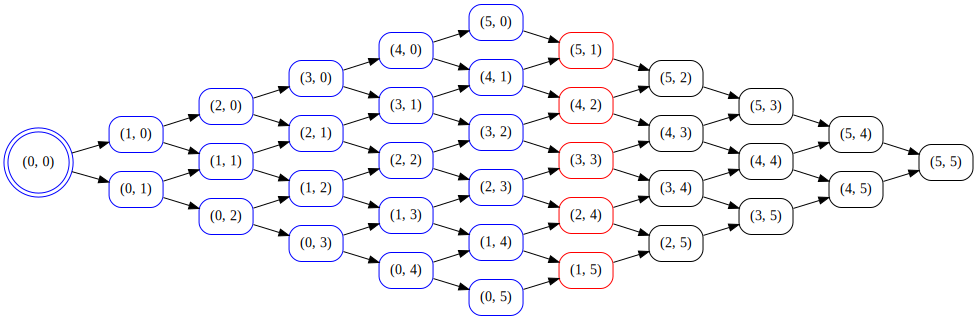

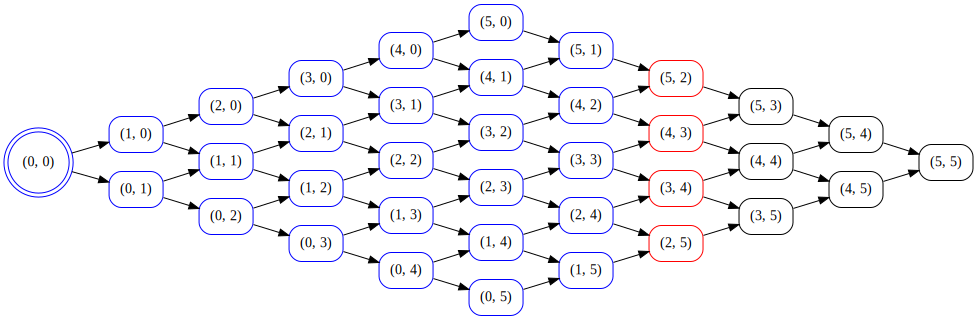

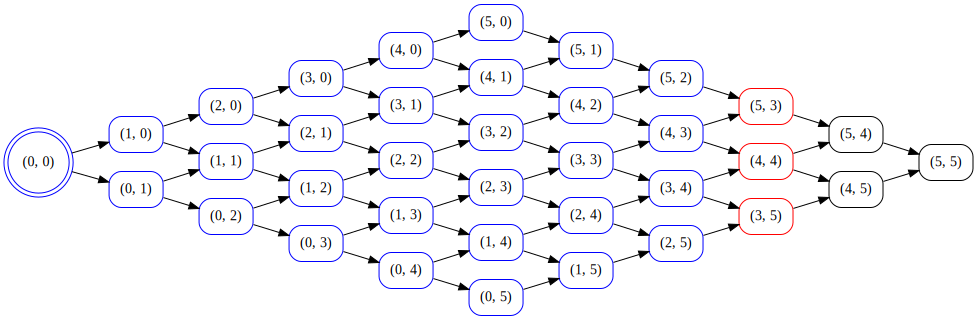

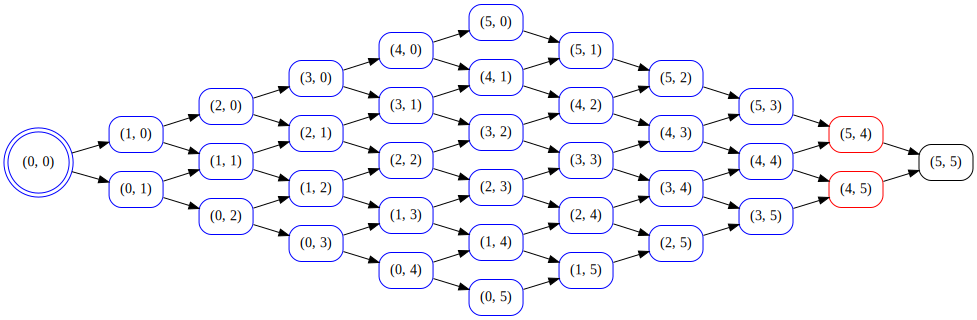

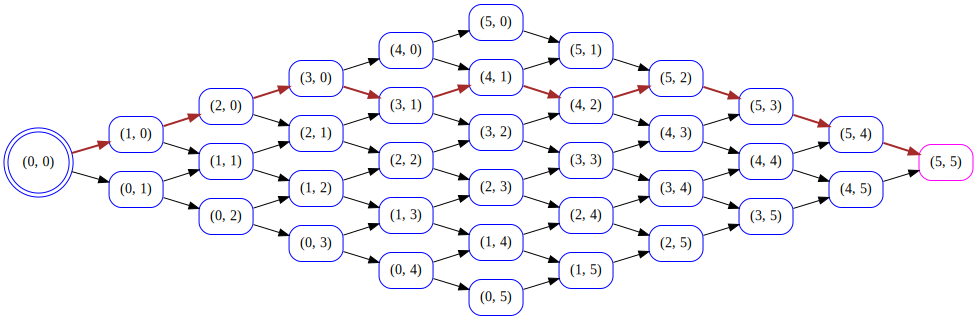

In [10]:
main(6)

# Saving the Infidels

In [11]:
%run Missionaries.ipynb

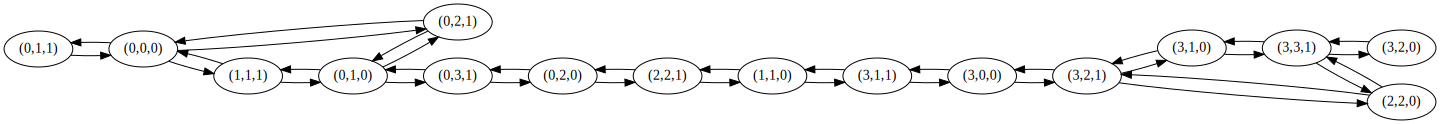

In [12]:
dot_graph(createRelation(start))

In [13]:
%%time
Path = search(start, goal, next_states)
printPath(Path)

number of states:  15
Solution:

MMM   KKK   B      |~~~~~|                   
                   > M K >
MM    KK           |~~~~~|         M     K  B
                   < M   <
MMM   KK    B      |~~~~~|               K   
                   >  KK >
MMM                |~~~~~|             KKK  B
                   <  K  <
MMM   K     B      |~~~~~|              KK   
                   > MM  >
M     K            |~~~~~|        MM    KK  B
                   < M K <
MM    KK    B      |~~~~~|         M     K   
                   > MM  >
      KK           |~~~~~|       MMM     K  B
                   <  K  <
      KKK   B      |~~~~~|       MMM         
                   >  KK >
      K            |~~~~~|       MMM    KK  B
                   <  K  <
      KK    B      |~~~~~|       MMM     K   
                   >  KK >
                   |~~~~~|       MMM   KKK  B
CPU times: user 762 µs, sys: 601 µs, total: 1.36 ms
Wall time: 946 µs


# Solving the Sliding Puzzle

In [14]:
%run Sliding-Puzzle.ipynb

The next line is needed to enable the `%memit` magic command.

In [15]:
%load_ext memory_profiler

In [16]:
%%time
%memit Path = search(start, goal, next_states)

number of states:  181440
peak memory: 180.68 MiB, increment: 79.95 MiB
CPU times: user 1.93 s, sys: 66.4 ms, total: 2 s
Wall time: 2.83 s


In [17]:
animation(Path)

Canvas()